# Titanic EDA â€” Overview

Exploratory data analysis for the Kaggle Titanic dataset. This notebook:
- Loads `data/train.csv` and `data/test.csv`.
- Summarizes structure, missingness, and target distribution.
- Visualizes key relationships with survival (by `Sex`, `Pclass`, `Age`, `Fare`, `Embarked`).
- Surfaces simple engineered signals (e.g., `FamilySize`) to guide modeling.

Run all cells top-to-bottom. Plots use seaborn/matplotlib.

In [5]:
# Imports and setup
from __future__ import annotations
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_theme(style="whitegrid")
except Exception:
    sns = None

warnings.filterwarnings("ignore")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

pd.options.display.max_columns = 100
pd.options.display.width = 120

DATA_TRAIN = '../data/train.csv'
DATA_TEST = '../data/test.csv'

## Load Data

In [6]:
train = pd.read_csv(DATA_TRAIN)
test = pd.read_csv(DATA_TEST)
len(train), len(test), train.columns.tolist()

(891,
 418,
 ['PassengerId',
  'Survived',
  'Pclass',
  'Name',
  'Sex',
  'Age',
  'SibSp',
  'Parch',
  'Ticket',
  'Fare',
  'Cabin',
  'Embarked'])

## Basic Structure

In [7]:
train.head()

PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch  \
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0   
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0   
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0   
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [8]:
train.describe(include='all').T

count unique                      top freq       mean         std   min     25%      50%    75%       max
PassengerId  891.0    NaN                      NaN  NaN      446.0  257.353842   1.0   223.5    446.0  668.5     891.0
Survived     891.0    NaN                      NaN  NaN   0.383838    0.486592   0.0     0.0      0.0    1.0       1.0
Pclass       891.0    NaN                      NaN  NaN   2.308642    0.836071   1.0     2.0      3.0    3.0       3.0
Name           891    891  Braund, Mr. Owen Harris    1        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Sex            891      2                     male  577        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Age          714.0    NaN                      NaN  NaN  29.699118   14.526497  0.42  20.125     28.0   38.0      80.0
SibSp        891.0    NaN                      NaN  NaN   0.523008    1.102743   0.0     0.0      0.0    1.0       8.0
Parch        891.0    NaN                      NaN  NaN   0.381594    0.806057   0.0     0.0      0.0    0.0       6.0
Ticket         891    681                   347082    7        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Fare         891.0    NaN                      NaN  NaN  32.204208   49.693429   0.0  7.9104  14.4542   31.0  512.3292
Cabin          204    147                  B96 B98    4        NaN         NaN   NaN     NaN      NaN    NaN       NaN
Embarked       889      3                        S  644        NaN         NaN   NaN     NaN      NaN    NaN       NaN

In [9]:
train.dtypes.to_frame('dtype')

dtype
PassengerId    int64
Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked      object

## Missingness

In [10]:
missing = train.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0].to_frame('missing')
missing['pct'] = (missing['missing'] / len(train) * 100).round(2)
missing

missing    pct
Cabin         687  77.10
Age           177  19.87
Embarked        2   0.22

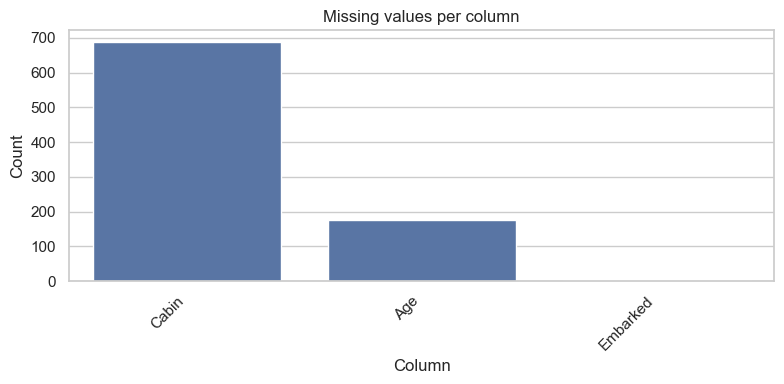

In [11]:
if sns is not None and not missing.empty:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=missing.index, y=missing['missing'], color="#4C72B0")
    plt.title('Missing values per column')
    plt.ylabel('Count')
    plt.xlabel('Column')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    missing


## Target Distribution (`Survived`)

In [12]:
target_col = 'Survived'
train[target_col].value_counts().to_frame('count').assign(pct=lambda d: (d['count']/len(train)).round(3))

count    pct
Survived              
0           549  0.616
1           342  0.384

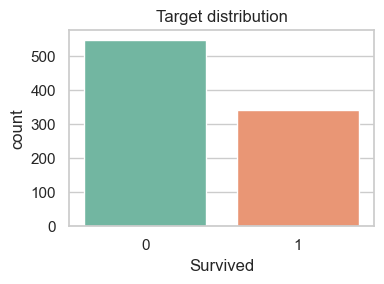

In [13]:
if sns is not None:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=target_col, data=train, palette="Set2")
    plt.title('Target distribution')
    plt.tight_layout()
    plt.show()


## Univariate Distributions

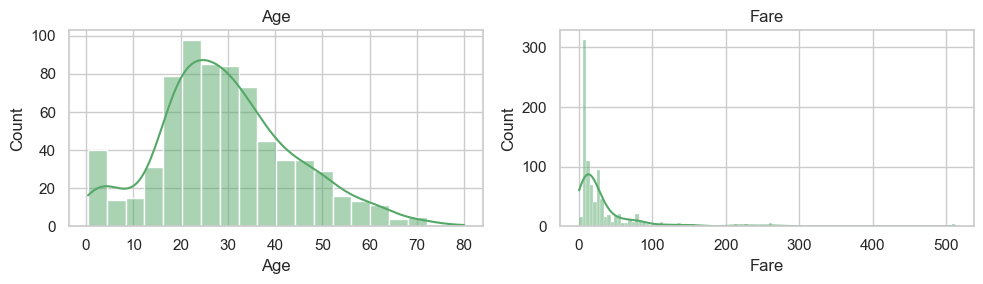

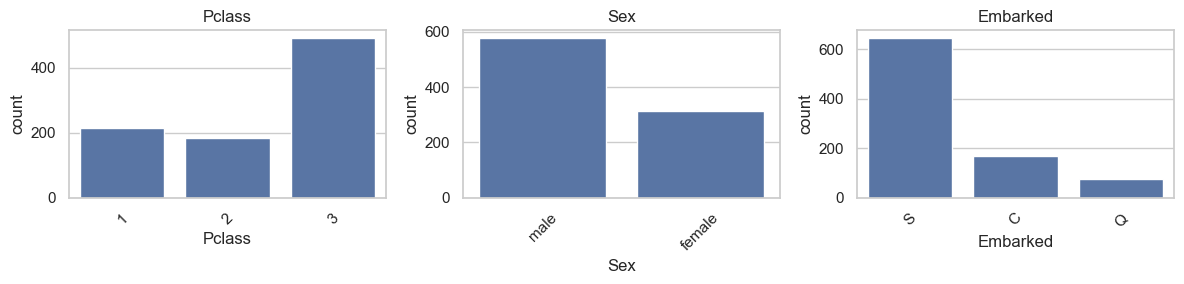

In [14]:
num_cols = ['Age', 'Fare']
cat_cols = ['Pclass', 'Sex', 'Embarked']

if sns is not None:
    fig, axes = plt.subplots(1, len(num_cols), figsize=(10, 3))
    for ax, col in zip(axes, num_cols):
        sns.histplot(train[col], kde=True, ax=ax, color="#55A868")
        ax.set_title(col)
    plt.tight_layout()
    plt.show()
    
    fig, axes = plt.subplots(1, len(cat_cols), figsize=(12, 3))
    for ax, col in zip(axes, cat_cols):
        sns.countplot(x=col, data=train, ax=ax, color="#4C72B0")
        ax.set_title(col)
        for tick in ax.get_xticklabels():
            tick.set_rotation(45)
    plt.tight_layout()
    plt.show()
else:
    train[num_cols + cat_cols].describe(include='all').T


## Survival by Key Features

In [15]:
def rate_by(col: str) -> pd.DataFrame:
    g = (train
         .groupby(col)['Survived']
         .agg(['mean', 'count'])
         .rename(columns={'mean': 'survival_rate'})
         .sort_values('survival_rate', ascending=False))
    return g

rate_by('Sex'), rate_by('Pclass'), rate_by('Embarked')


(        survival_rate  count
 Sex                         
 female       0.742038    314
 male         0.188908    577,
         survival_rate  count
 Pclass                      
 1            0.629630    216
 2            0.472826    184
 3            0.242363    491,
           survival_rate  count
 Embarked                      
 C              0.553571    168
 Q              0.389610     77
 S              0.336957    644)

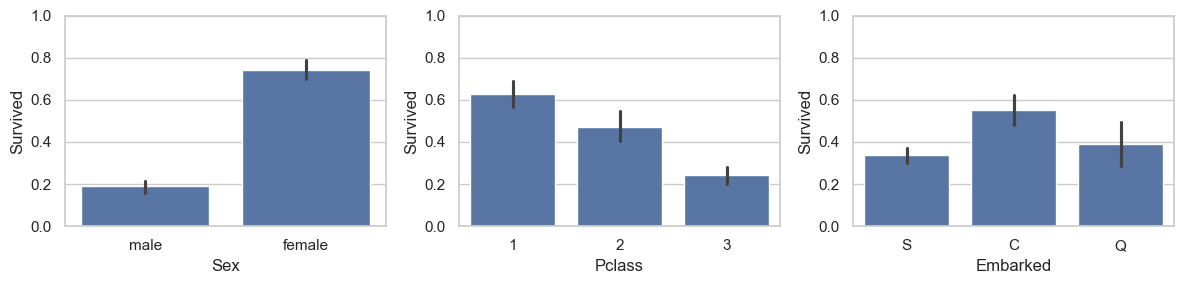

In [16]:
if sns is not None:
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    sns.barplot(x='Sex', y='Survived', data=train, ax=axes[0])
    sns.barplot(x='Pclass', y='Survived', data=train, ax=axes[1])
    sns.barplot(x='Embarked', y='Survived', data=train, ax=axes[2])
    for ax in axes:
        ax.set_ylim(0, 1)
    plt.tight_layout()
    plt.show()


## Age Bins and Survival

In [17]:
age_bins = pd.cut(train['Age'], bins=[0, 5, 12, 18, 30, 45, 60, 80], include_lowest=True)
age_rates = train.assign(AgeBin=age_bins).groupby('AgeBin')['Survived'].mean().to_frame('survival_rate')
age_rates

survival_rate
AgeBin                      
(-0.001, 5.0]       0.704545
(5.0, 12.0]         0.360000
(12.0, 18.0]        0.428571
(18.0, 30.0]        0.355556
(30.0, 45.0]        0.425743
(45.0, 60.0]        0.407407
(60.0, 80.0]        0.227273

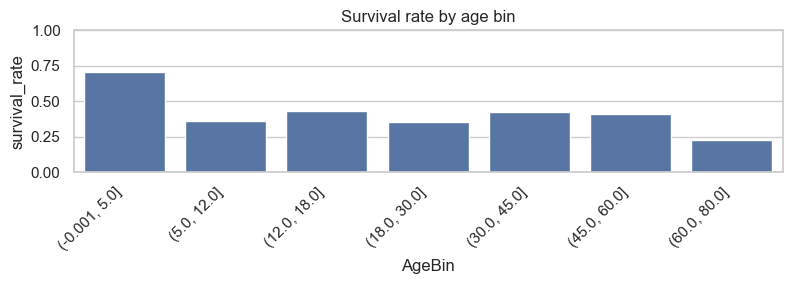

In [18]:
if sns is not None:
    plt.figure(figsize=(8, 3))
    sns.barplot(x=age_rates.index.astype(str), y=age_rates['survival_rate'])
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.title('Survival rate by age bin')
    plt.tight_layout()
    plt.show()


## Simple Engineered Signals

In [19]:
fe = train.copy()
fe['FamilySize'] = fe['SibSp'] + fe['Parch'] + 1
fe['IsAlone'] = (fe['FamilySize'] == 1).astype(int)

family_rate = fe.groupby('FamilySize')['Survived'].mean().to_frame('survival_rate')
isalone_rate = fe.groupby('IsAlone')['Survived'].mean().to_frame('survival_rate')
family_rate.head(), isalone_rate


(            survival_rate
 FamilySize               
 1                0.303538
 2                0.552795
 3                0.578431
 4                0.724138
 5                0.200000,
          survival_rate
 IsAlone               
 0             0.505650
 1             0.303538)

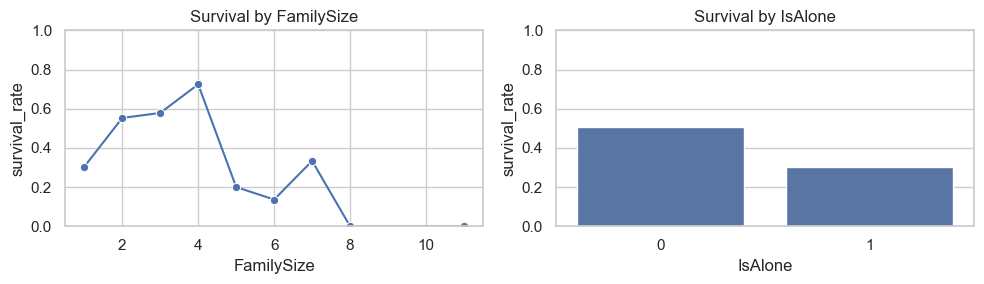

In [20]:
if sns is not None:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    sns.lineplot(x=family_rate.index, y=family_rate['survival_rate'], marker='o', ax=axes[0])
    axes[0].set_title('Survival by FamilySize')
    axes[0].set_ylim(0, 1)
    sns.barplot(x=isalone_rate.index.astype(str), y=isalone_rate['survival_rate'], ax=axes[1])
    axes[1].set_title('Survival by IsAlone')
    axes[1].set_ylim(0, 1)
    plt.tight_layout()
    plt.show()


## Correlations (Numeric)

In [21]:
num_for_corr = train[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']].copy()
corr = num_for_corr.corr()
corr

Survived       Age      Fare     SibSp     Parch
Survived  1.000000 -0.077221  0.257307 -0.035322  0.081629
Age      -0.077221  1.000000  0.096067 -0.308247 -0.189119
Fare      0.257307  0.096067  1.000000  0.159651  0.216225
SibSp    -0.035322 -0.308247  0.159651  1.000000  0.414838
Parch     0.081629 -0.189119  0.216225  0.414838  1.000000

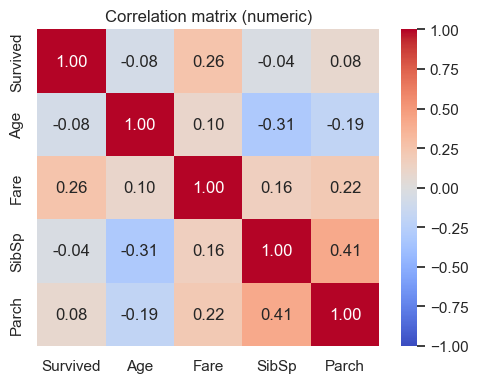

In [22]:
if sns is not None:
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation matrix (numeric)')
    plt.tight_layout()
    plt.show()


## Notes
- Strong survival differences by `Sex` and `Pclass`.
- Non-linear effects in `Age` bins (children higher survival).
- `FamilySize` and `IsAlone` show signal; may help simple models.
- Handle missing values (`Age`, `Cabin`, `Embarked`) in preprocessing.
- Consider extracting `Title` from `Name` and deck from `Cabin`.